<a href="https://colab.research.google.com/github/igntrevor/AI-ML-School-Work/blob/main/Group_15_Assignment_2_Customer__Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group 15 Members**


# 1.   Moses Guloba
# 2.   Giles Mwesigye
# 3.   Ignatius Balayo



# Question 2

In [ ]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load dataset
filename = '/content/drive/MyDrive/refactory/cust_seg.csv'
data = pd.read_csv(filename)
data = data.set_index('Customer Id')
data = data.drop(columns ='Unnamed: 0')
# Check for and drop missing values
data.isna().any()
data = data.dropna()
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


<Axes: >

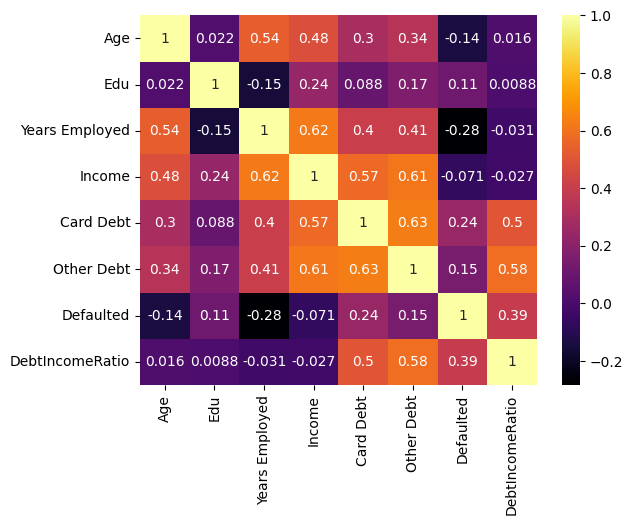

In [ ]:
# Create Correlation heatmap
corr_data = data.corr(numeric_only= True)
sns.heatmap(corr_data, annot=True, cmap='inferno')

In [ ]:
#Make a copy of the Dataframe
data1 = data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 850
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              700 non-null    int64  
 1   Edu              700 non-null    int64  
 2   Years Employed   700 non-null    int64  
 3   Income           700 non-null    int64  
 4   Card Debt        700 non-null    float64
 5   Other Debt       700 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 49.2 KB


# Feature Scaling

In [ ]:
#Creating an Instance of the Standard Scaler
scaler = StandardScaler()
#Fitting and tranformation of the data
scaled_data = scaler.fit_transform(data1)

KNN CLUSTERING
1. Using the Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

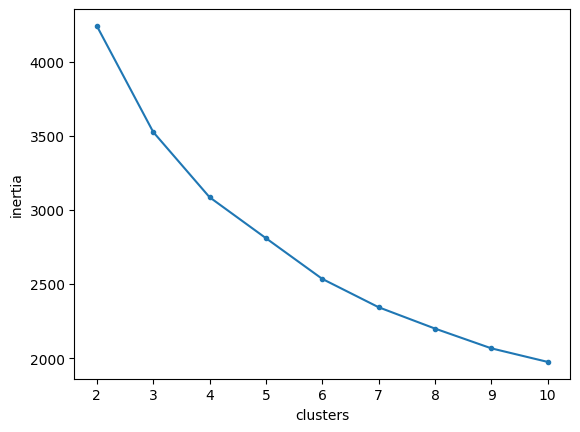

In [ ]:
##Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_data)
  inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

From The Elbow Method Plot, 3 clusters is a good number of clusters to use

KNN Clustering
USING SIHLOUETTE SCORE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

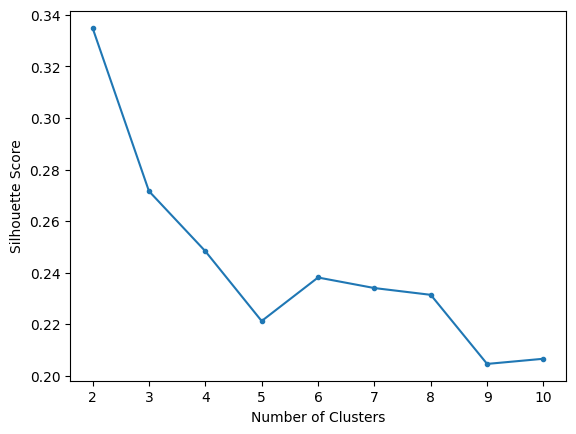

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_data)
  silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

From the graph above we choose 2 clusters to use

In [ ]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_data)
kmeans3.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

#Save the cluster labels

In [ ]:
#Save the Cluster Labels
data1['cluster2'] = kmeans2.labels_
data1['cluster3'] = kmeans3.labels_

#Checking the Dataframe
data1.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster2,cluster3
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0,2
2,47,1,26,100,4.582,8.218,0.0,12.8,1,1
3,33,2,10,57,6.111,5.802,1.0,20.9,1,0
4,29,2,4,19,0.681,0.516,0.0,6.3,0,2
5,47,1,31,253,9.308,8.908,0.0,7.2,1,1


# Analytical Visualizations: Kmeans with 2 clusters

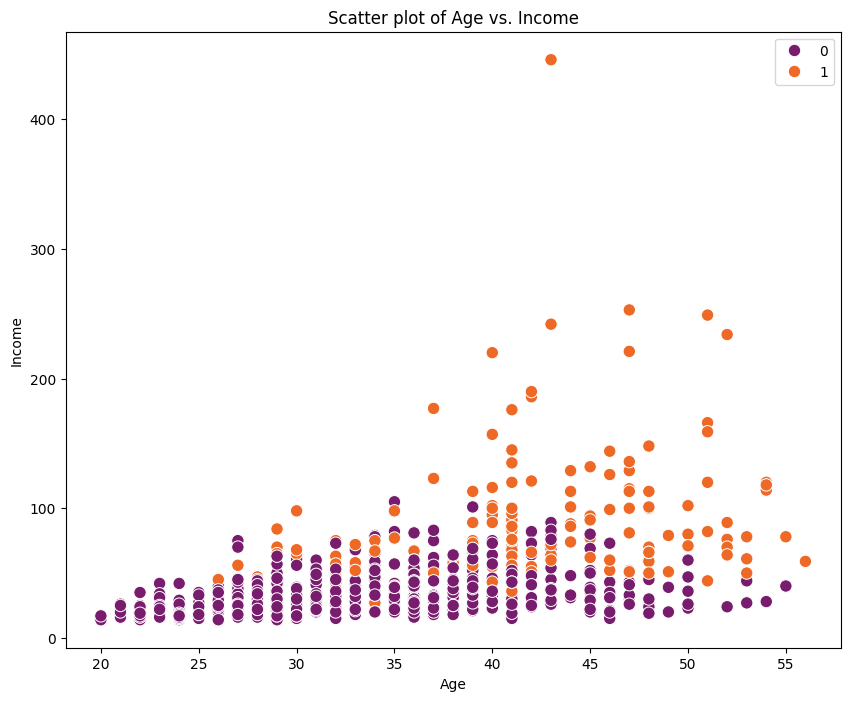

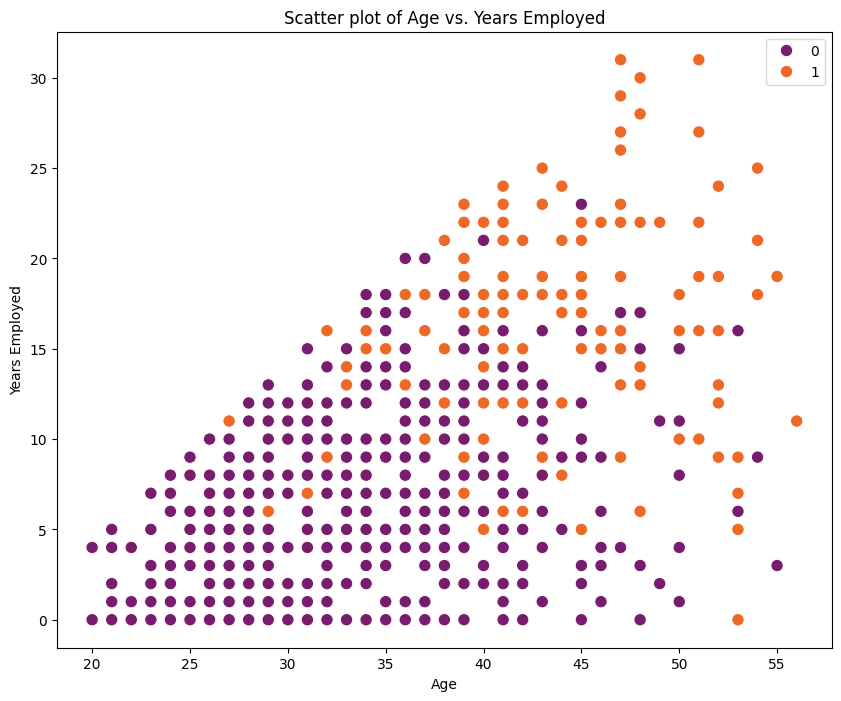

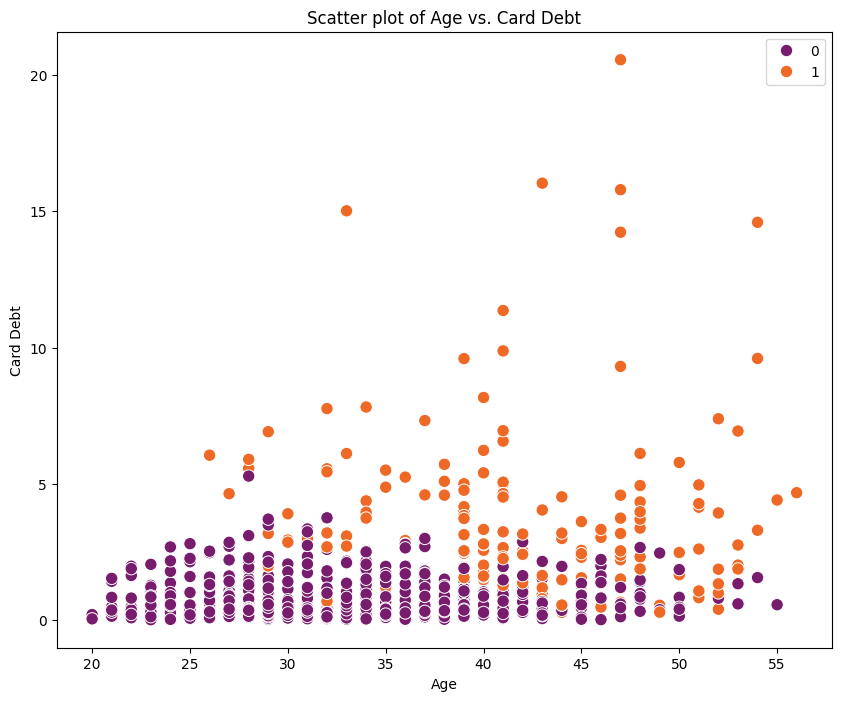

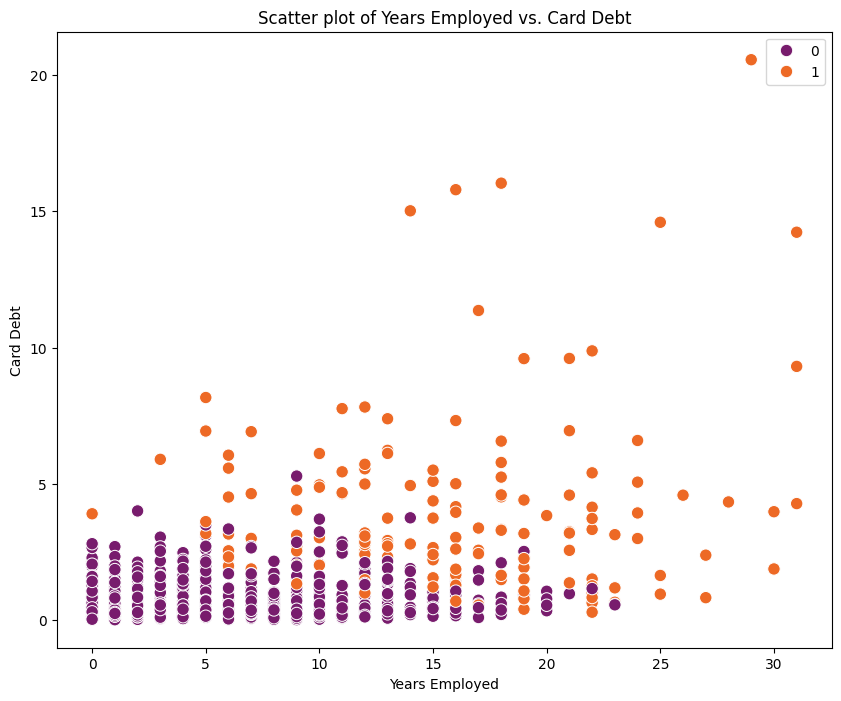

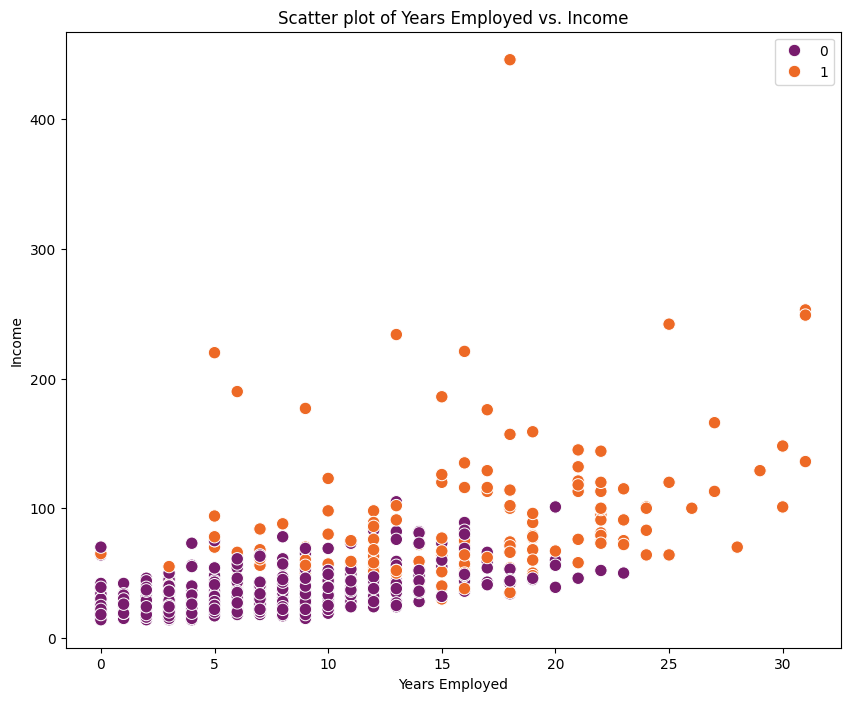

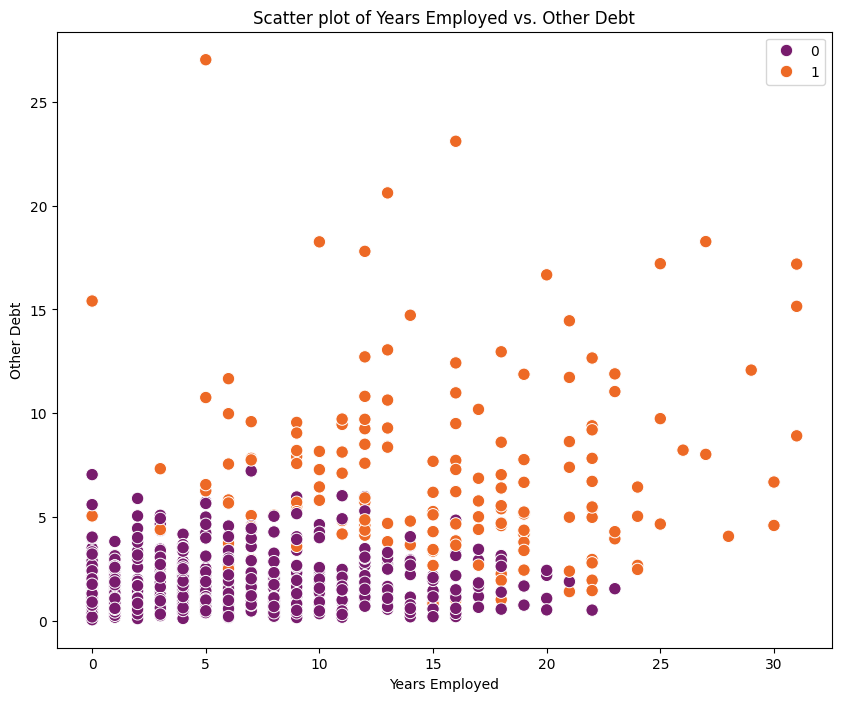

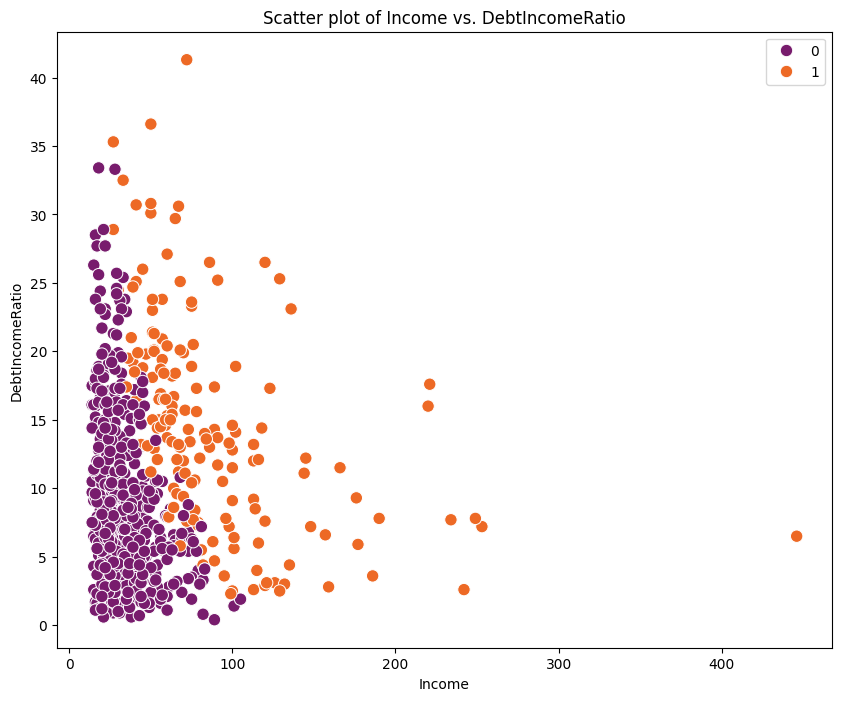

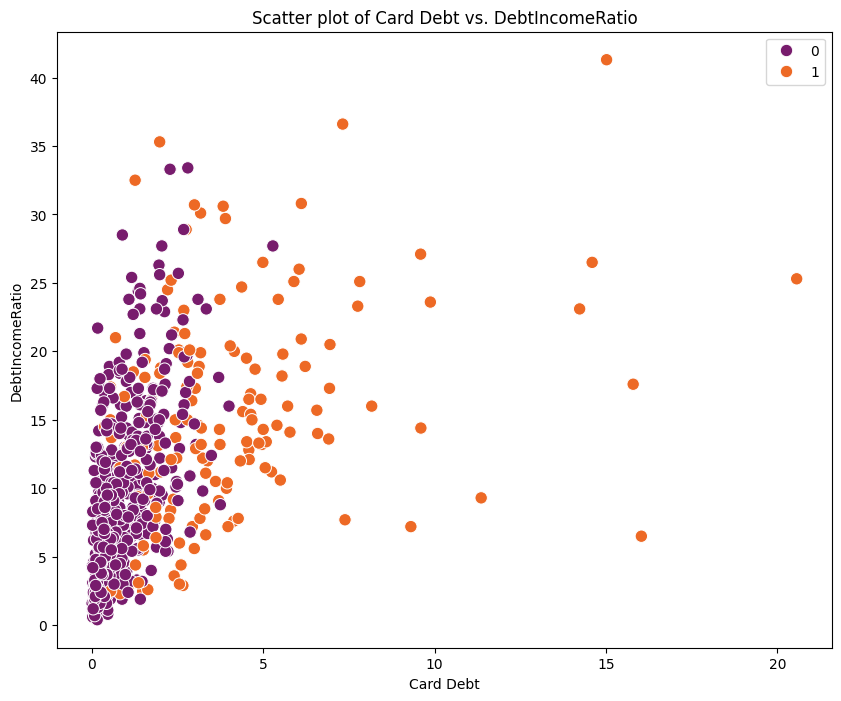

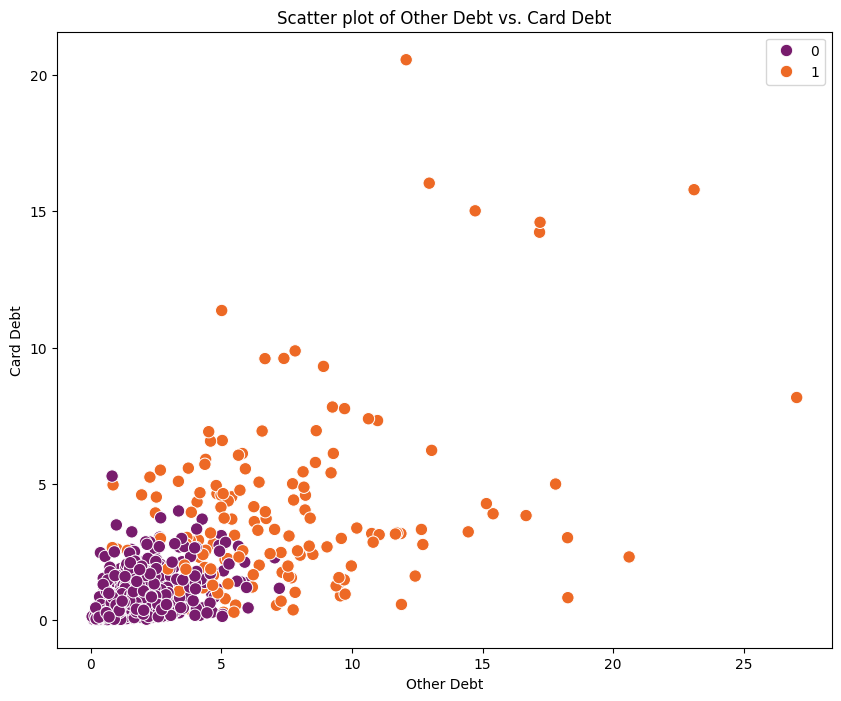

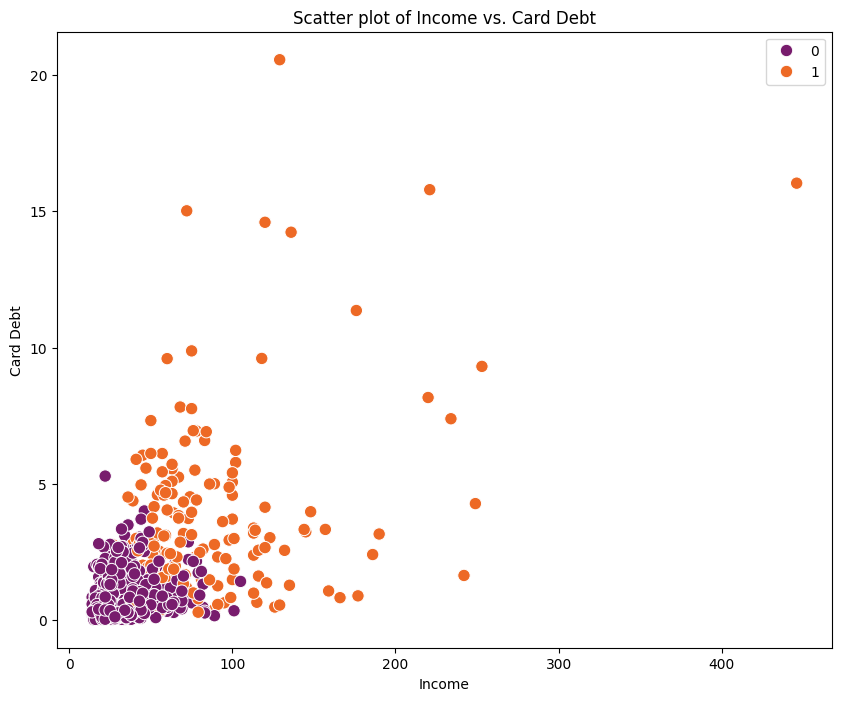

In [ ]:
# Function to create scatter plots for each feature pair
def visualize_scatter(feature_x, feature_y):
    plt.figure(figsize=(10, 8))

    # Scatter plot for each cluster with different colors
    sns.scatterplot(x=feature_x, y=feature_y, hue='cluster2', data=data1, palette='inferno', s=80)

    plt.title(f'Scatter plot of {feature_x} vs. {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()


# Visualize scatter plots for selected feature pairs
feature_pairs_to_visualize = [('Age', 'Income'),('Age', 'Years Employed'), ('Age', 'Card Debt'), ('Years Employed', 'Card Debt'), ('Years Employed', 'Income'), ('Years Employed', 'Other Debt'), ('Income', 'DebtIncomeRatio'), ( 'Card Debt', 'DebtIncomeRatio'), ('Other Debt', 'Card Debt'), ('Income', 'Card Debt') ]
for feature_x, feature_y in feature_pairs_to_visualize:
    visualize_scatter(feature_x, feature_y)

# Analytical Visualizations: Kmeans with 2 clusters

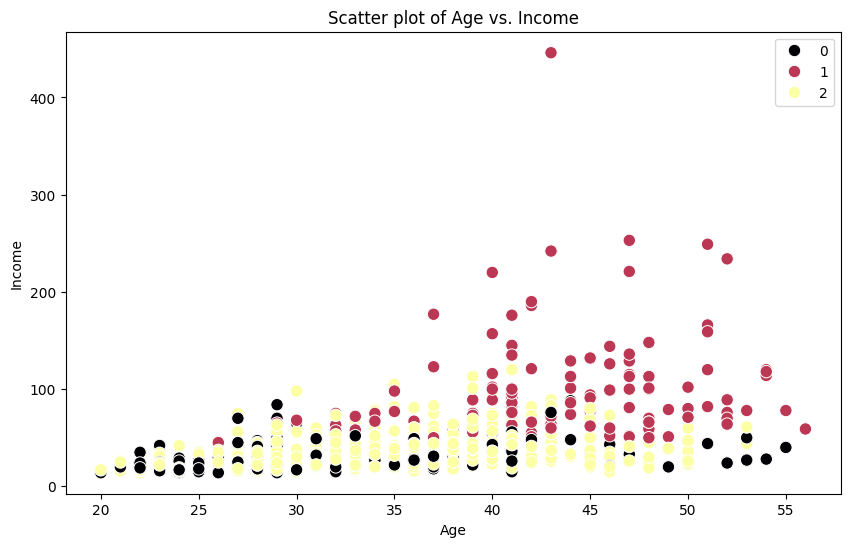

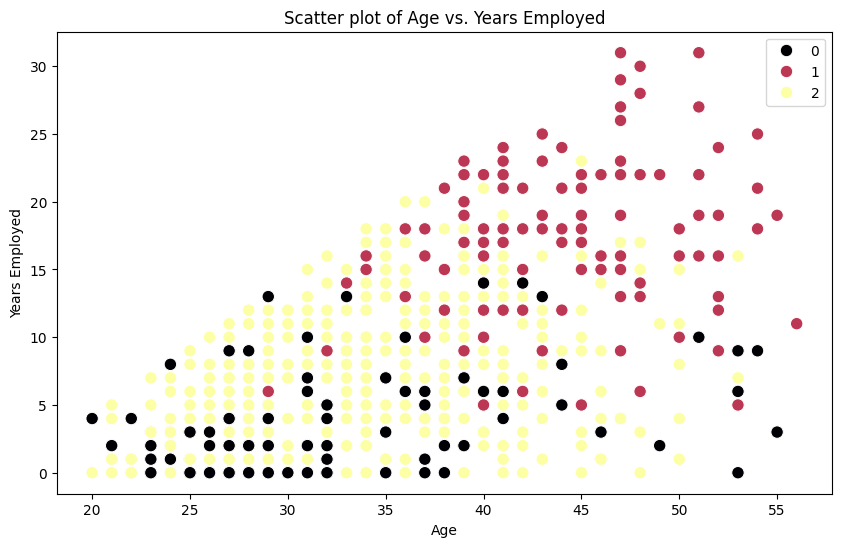

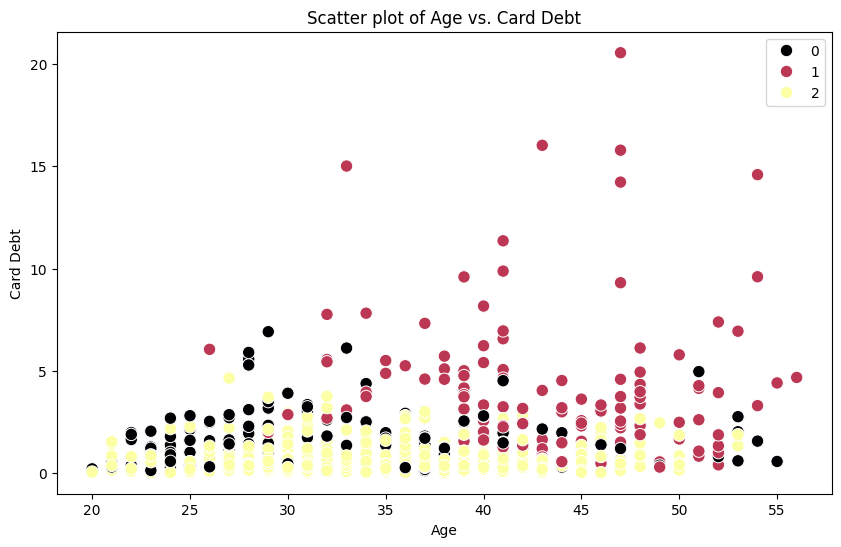

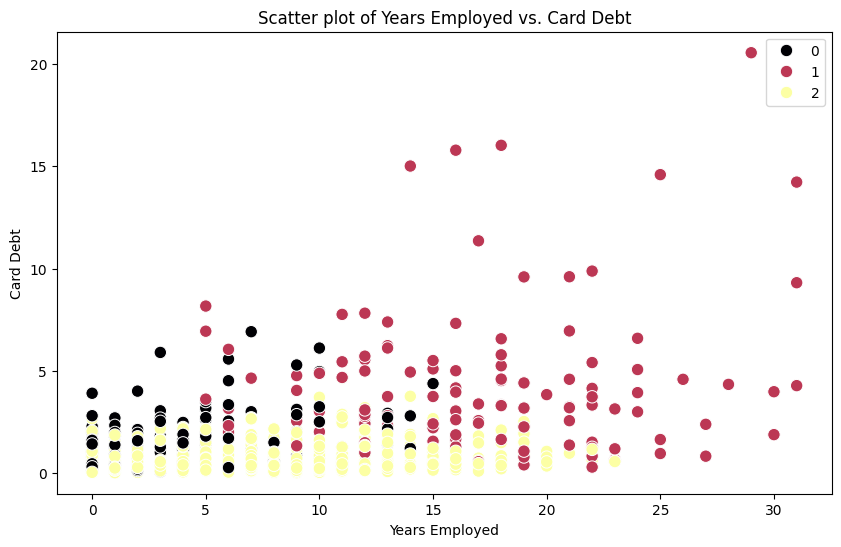

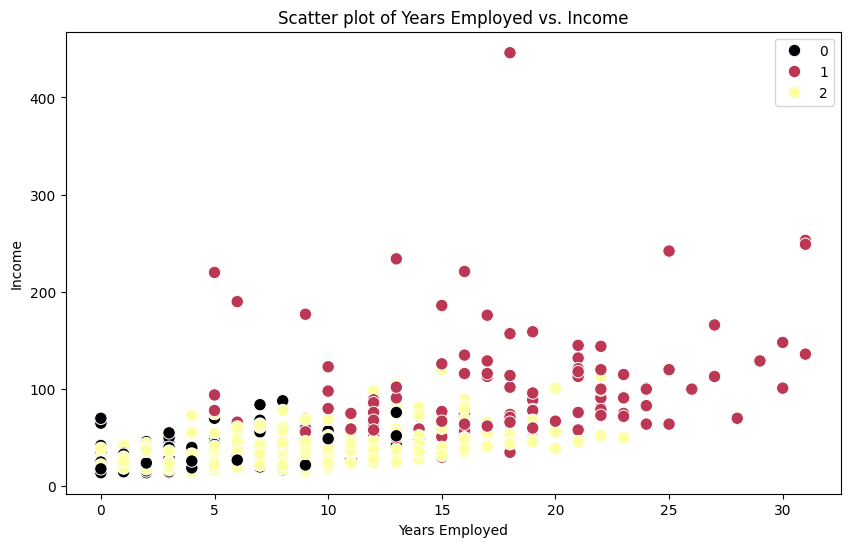

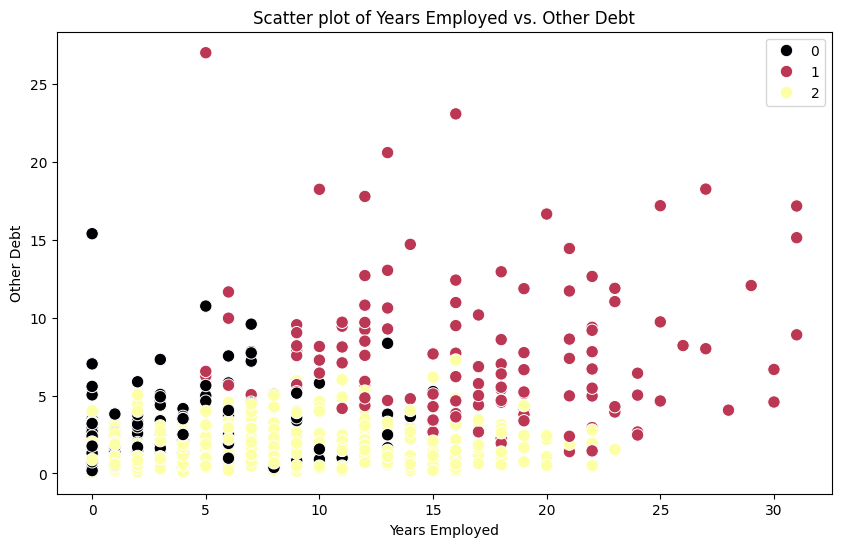

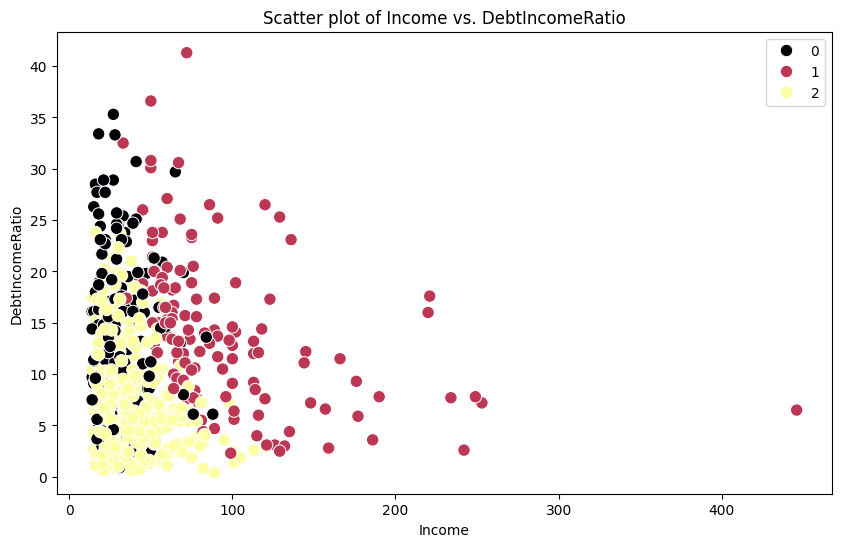

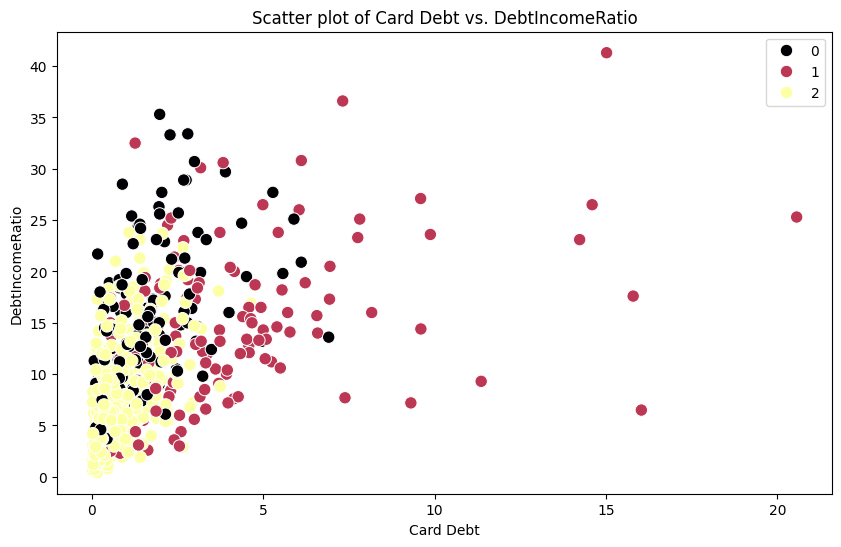

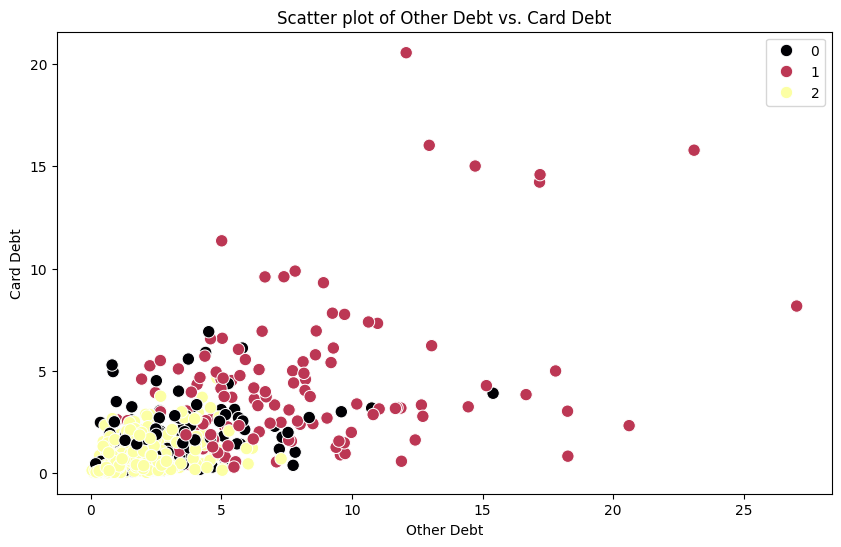

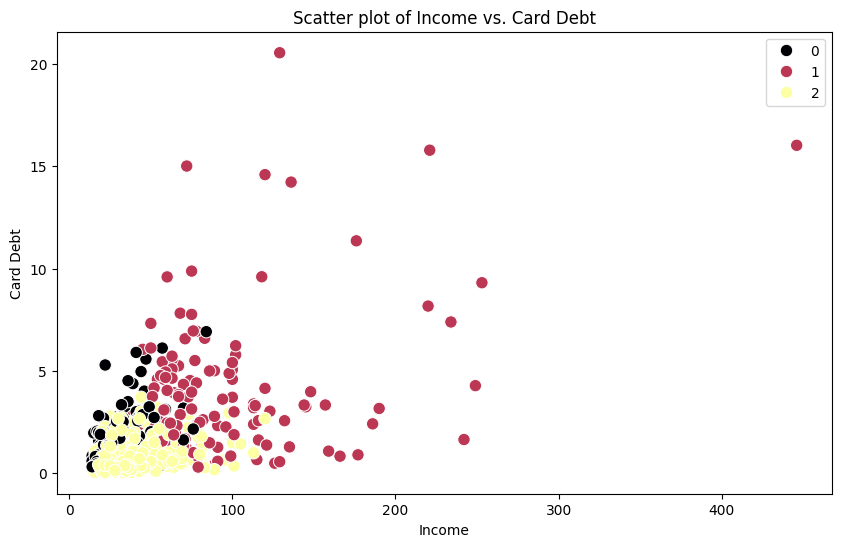

In [ ]:
# Function to create scatter plots for each feature pair
def visualize_scatter(feature_x, feature_y):
    plt.figure(figsize=(10, 6))

    # Scatter plot for each cluster
    sns.scatterplot(x=feature_x, y=feature_y, hue='cluster3', data=data1, palette='inferno', s=80)

    plt.title(f'Scatter plot of {feature_x} vs. {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()

# Visualize scatter plots for selected feature pairs
feature_pairs_to_visualize = [('Age', 'Income'),('Age', 'Years Employed'), ('Age', 'Card Debt'), ('Years Employed', 'Card Debt'), ('Years Employed', 'Income'), ('Years Employed', 'Other Debt'), ('Income', 'DebtIncomeRatio'), ( 'Card Debt', 'DebtIncomeRatio'), ('Other Debt', 'Card Debt'), ('Income', 'Card Debt') ]

for feature_x, feature_y in feature_pairs_to_visualize:
    visualize_scatter(feature_x, feature_y)

From the Analytical visualizations, its best to cluster into two segmements e.g the Age and years employed

**Segment 1**

Represents a younger age group with lower income and shorter years of employment. They have lower levels of debt, indicating they spend less..
Interpretation:
This segment represents younger customers who are early in their careers with lower income. They spend less, leading to a lower level of debt.

**Segment 2**
This segment represents a demographic characterized by older age, higher income, and significant years of employment, suggesting stability in their careers. The higher income likely allows them to accumulate more debt, including credit card debt and other forms of borrowing.

Interpretation:
This segment represents financially secure individuals who are adept at managing their debt, leveraging their higher income and stability in their careers to maintain their financial well-being while enjoying a comfortable lifestyle.

Marketing Strategy Recommendation

Segment 1:
1. Offer credit cards with lower credit limits and tailored benefits suitable for individuals early in their careers.
2. Provide resources and workshops on budgeting, saving, and responsible credit card use to help them build financial literacy.
3. Design reward programs focusing on everyday spending categories like groceries, dining, and entertainment to appeal to their limited spending habits

Segment 2:
1. Provide investment-related services like wealth management, retirement planning, and high-yield savings accounts to cater to their financial stability and long-term goals.
2. Personalize offers based on their spending patterns, such as discounts on luxury items, travel packages, or upscale dining experiences.

Hierarchical Clustering:

In [18]:
# Make copy of our dataframe
data2 = data.copy()
data2.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [19]:
# Creating an Instance of the Standard Scaler
scaler = StandardScaler()
# Fitting and transforming our data.
scaled_data2 = scaler.fit_transform(data2)

# Hierachical Clustering - KMeans(2 Clusters)

In [22]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = model.fit_predict(scaled_data2)
data2['cluster_label2'] = cluster_labels
data2.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_label3,cluster_label2
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0,0
2,47,1,26,100,4.582,8.218,0.0,12.8,1,1
3,33,2,10,57,6.111,5.802,1.0,20.9,1,1
4,29,2,4,19,0.681,0.516,0.0,6.3,0,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1,1


# Visualization of Hierarchical clustering 2 clusters

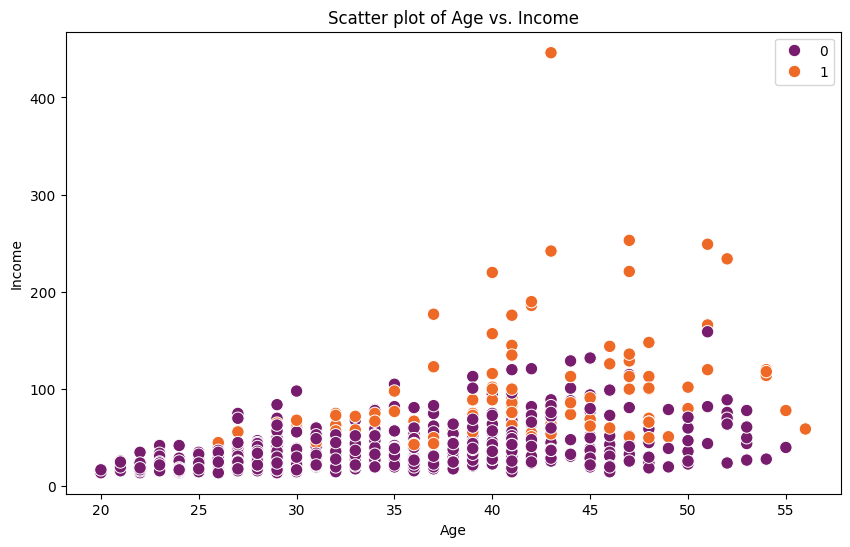

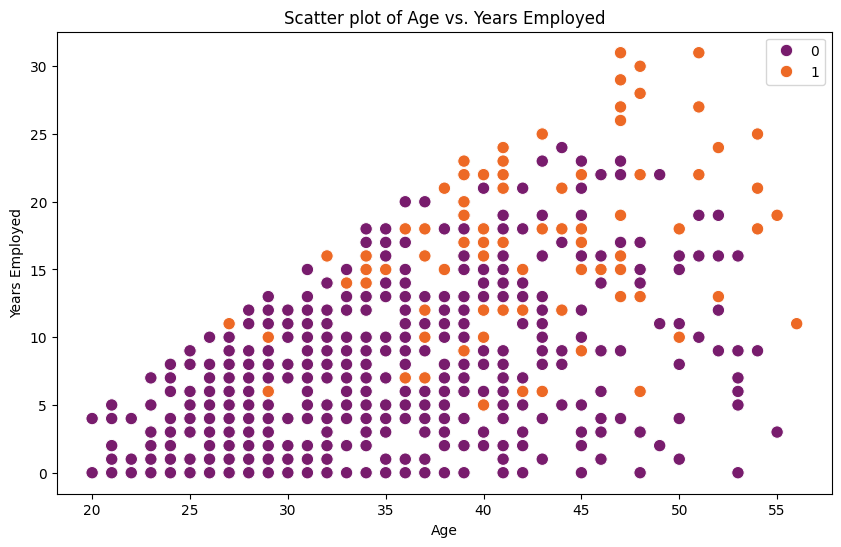

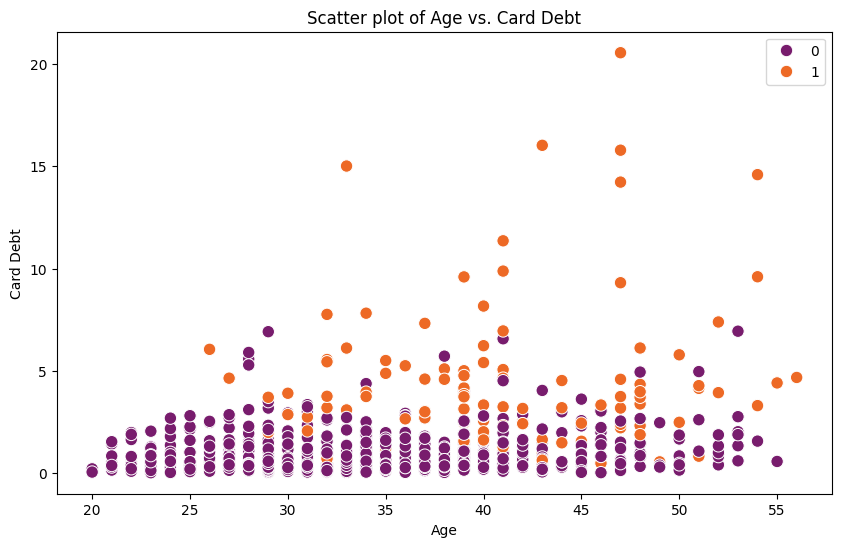

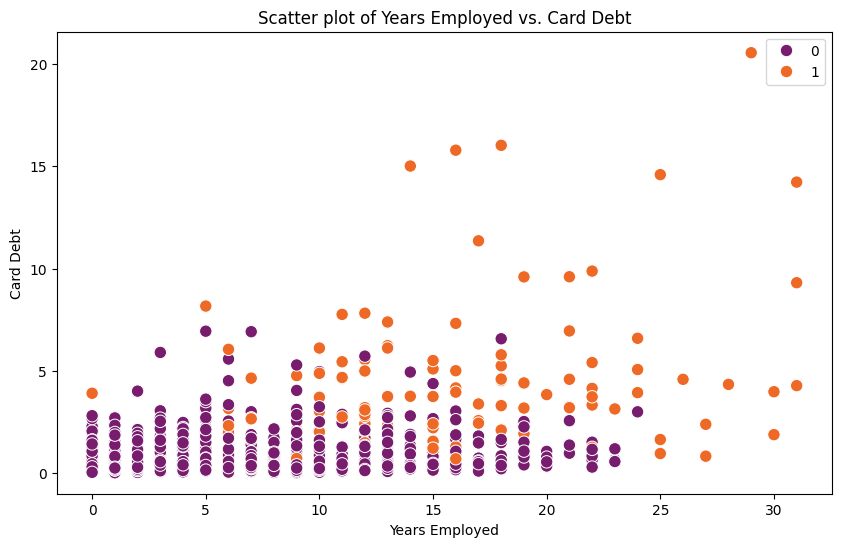

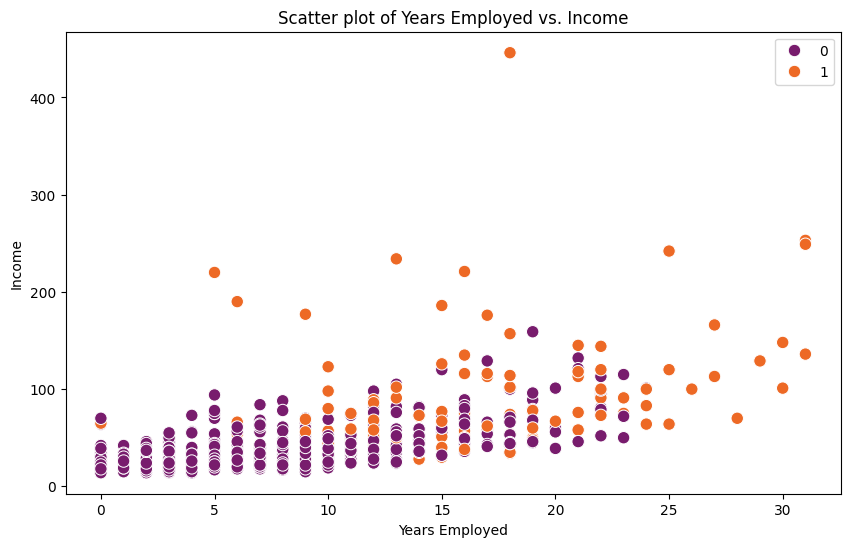

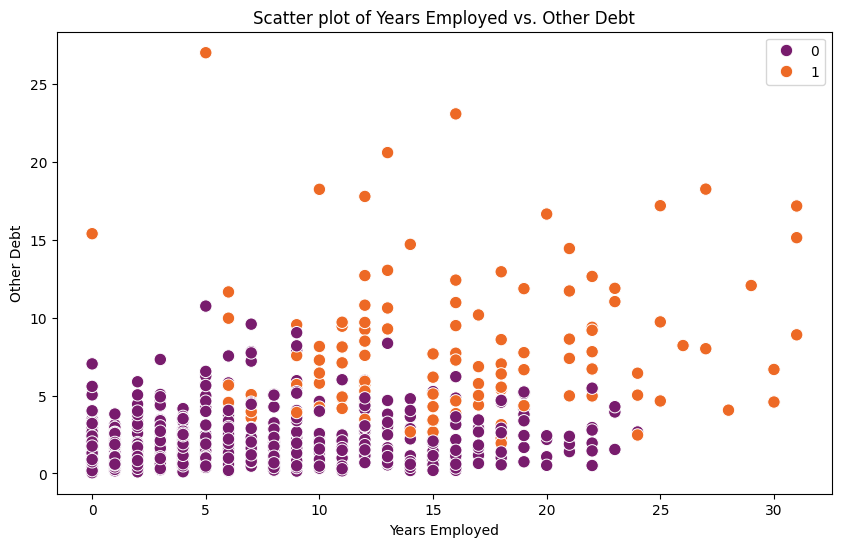

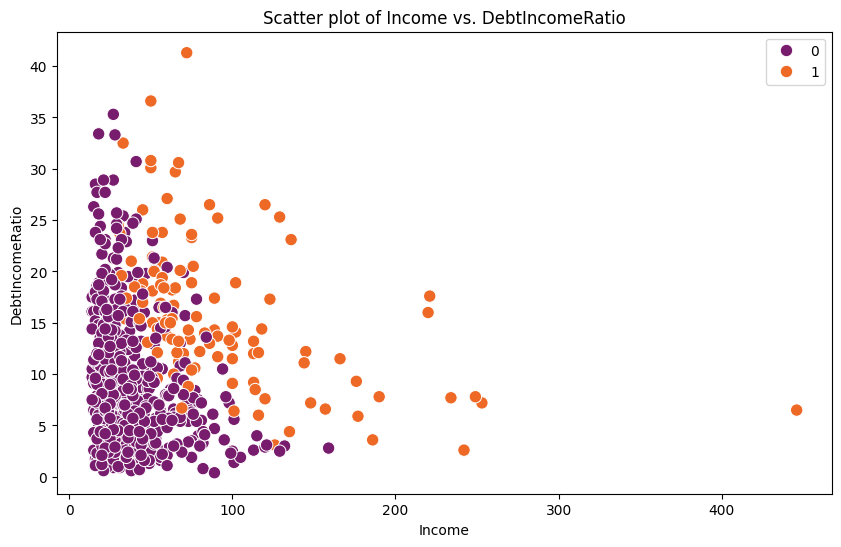

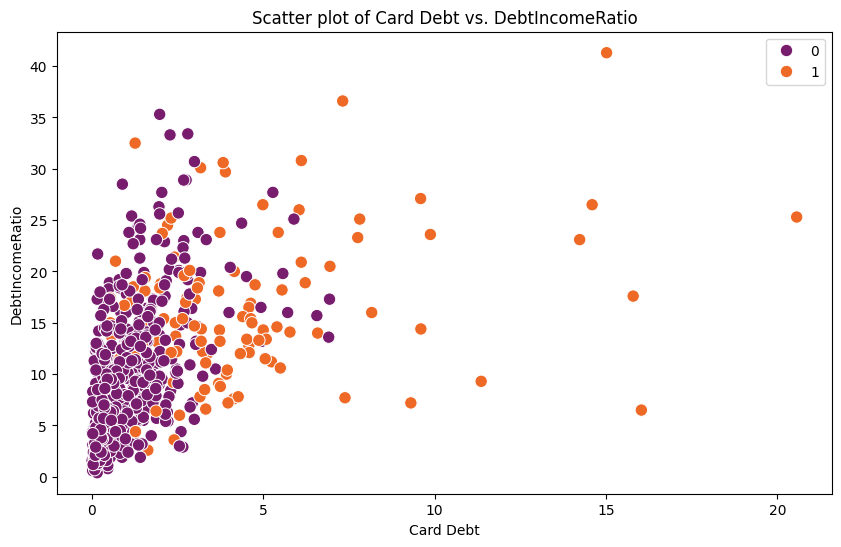

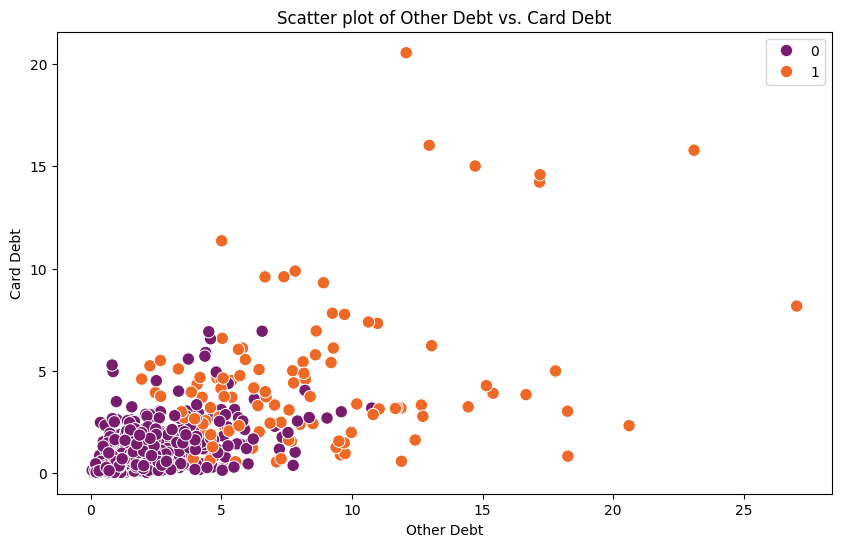

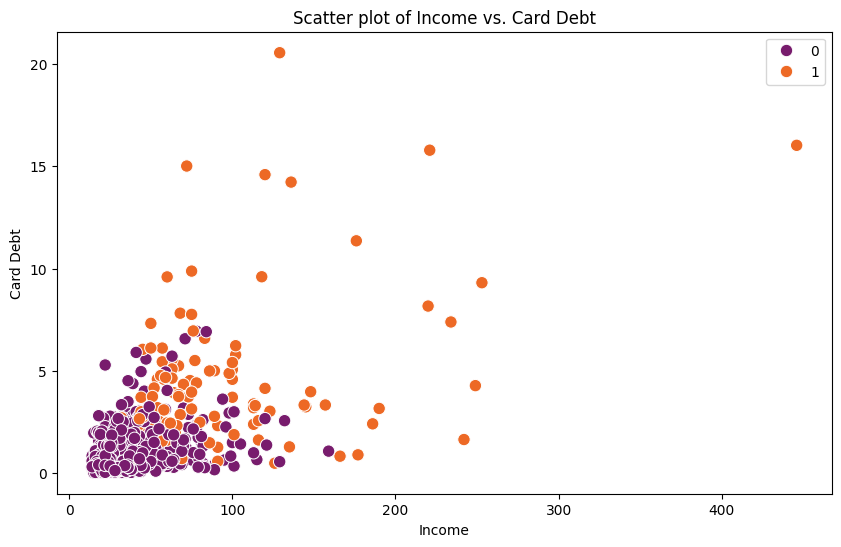

In [23]:
# Function to create scatter plots for each feature pair
def visualize_scatter(feature_x, feature_y):
    plt.figure(figsize=(10, 6))

    # Scatter plot for each cluster
    sns.scatterplot(x=feature_x, y=feature_y, hue='cluster_label2', data=data2, palette='inferno', s=80)

    plt.title(f'Scatter plot of {feature_x} vs. {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend()
    plt.show()

# Visualize scatter plots for selected feature pairs
feature_pairs_to_visualize = [('Age', 'Income'),('Age', 'Years Employed'), ('Age', 'Card Debt'), ('Years Employed', 'Card Debt'), ('Years Employed', 'Income'), ('Years Employed', 'Other Debt'), ('Income', 'DebtIncomeRatio'), ( 'Card Debt', 'DebtIncomeRatio'), ('Other Debt', 'Card Debt'), ('Income', 'Card Debt') ]

for feature_x, feature_y in feature_pairs_to_visualize:
    visualize_scatter(feature_x, feature_y)